# A bad example of an auto-encoder that works* on our data:


# ...but, at least we got it working!

In [243]:
import semanticnet as sn
import networkx as nx
import numpy as np
import pandas as pd

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

Imported the data from Redteam.txt

This is the first 10,000 lines from the file. 

In [244]:
import pandas as pd
    
#"time,source user@domain,destination user@domain, source computer,
#destination computer,authentication type,logon type,authentication orientation,success/failure"    
    
    
data = pd.read_table('Data/redteam_10k.txt', sep=',', header=None,
                 names = ["time",
                          "source_usr_dm", 
                          "dest_usr_dm", 
                          "source_comp", 
                          "dest_comp", 
                          "auth_tp", 
                         "logon_tp", 
                          "auth_or", 
                          "event_s_f"])

1. Use Networkx to create a matrix that is readable into Pandas. 

2. Using Networkx.to_pandas_dataframe(g) we get a X x Y matrix of Source x Destination

3. In Progress: This is for the first 10k rows, and needs to be optimized to see things move through time.

In [245]:
# initialize an empty graph from pd_data_frame
g = nx.from_pandas_dataframe(data, source='source_comp', target='dest_comp') 

In [246]:
x = nx.to_pandas_dataframe(g)

In [247]:
data10k = pd.DataFrame(x)

In [248]:
data10k.head()

,C1173,C1006,U6,C1215,U3,C1119,C1042,C585,C586,C1014,C1015,C625,C743,C1114,C1096,C1191,C10,C523,TGT,C1884,C528,C529,C467,C1124,C1737,C1931,C1,C113,C46,C1222,C1224,C1046,C1065,U25,C612,C1028,C1269,C1268,C1022,C599,C1125,C115,C1003,C1085,C2106,C1089,C2327,C1183,C108,C457,C104,C1708,C1640,C126,C102,C103
C1173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1215,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
data10k_test = data10k # seeing if this works as a test set (a duplicate, so same dimentions)

### Keras Auto-Encoder

1. Basic auto-encoder with 2 levels = encoder, 2 levels = decoder. 
2. This can most definetly be hypertuned - Still working on best model. Probably, 1D convolutional neural network when we start dealing with Tbs of data. this will help us hone in very small changes. 

In [250]:
#import pandas as pd
#import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
#LABELS = ["Normal", "Fraud"]

In [251]:
from sklearn.preprocessing import StandardScaler

##### The idea here is to create a dupulicate X_train & X_test. Since we are trying to "reconstruct" the data (and this is a test to see if it works!!! :) ) this is a good starting place. 

In [253]:
X_train = data10k
X_test = data10k_test


In [254]:
print X_train.shape[0], X_train.shape[1]
print X_test.shape[0], X_test.shape[1] 

56 56
56 56


Setting up dimensions 

In [423]:
input_dim = X_train.shape[0] ### Dimesions of X_train set
encoding_dim = 14 

Setting up layers:

(Example... our Auto-Encoder is going from 56 (inputs), -> 14 (1st layer) -> 7 (2nd layer) -> 7 (3rd layer) -> 14 (last layer)

        1            1
        2   \     /  2
        :    1 - 1   :
        :    :   :   :
        :    7 - 7   :
        13  /     \  13
        14           14

This model can be changed just about any way you can think and long as you compress the inner layers down in a similar fashion. 

In [583]:
####
#input_layer = Input(shape=(input_dim, ))
#encoder = Dense(encoding_dim, activation="tanh")(input_layer)
                #activity_regularizer=regularizers.l1(10e-5))(input_layer)
#encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
#encoder = Dense(int(encoding_dim / 7), activation="relu")(encoder)
#decoder = Dense(int(encoding_dim / 7), activation='tanh')(encoder)
#decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
#decoder = Dense(input_dim, activation='softmax')(decoder)
#autoencoder = Model(inputs=input_layer, outputs=decoder)

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

#### Encoder: 

1. This is the part of the network that compresses the input into a fewer components. The space represented by these fewer components is called the “latent-space” and the point of maximum compression is called the bottleneck. These compressed parts that represent the original input are together called an “encoding” of the input.

#### Decoder: 

2. This is the part of the network that reconstructs the input image (matrix in our case) using the encoding of the image.

In [584]:
""" This section is built to compile the model and set up any checkpoints """

nb_epoch = 250     ### Number of iterations run.
batch_size = 32  ### Size of sample to be used each time data loaded

autoencoder.compile(optimizer='adam',              #Optimizer
                    loss='binary_crossentropy',     # Loss Metric
                    metrics=['accuracy'])          #Accuracy

#save the best performing model to a file...
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

#training progress will be exported in a format that TensorBoard understands
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
# Fitting the model
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),  #Remember our validation set is an identical copy!!!
                    verbose=0,
                    callbacks=[checkpointer, tensorboard]).history

###### BELOW:
# 1. We want to minimize the loss function, while improving our accuracy 
# 2. Loss function is calculated by the optimizer which is taking the derivative (dJ/dx + dJ/dy + dJ/dz) over and over to solve for
# the closest vale that minimizes loss. 

In [426]:
### Truthfully, I havent found this to do anything by loading the model... It has no effect on the loss, val_loss plot
## Maybe interesting for someone to explore?? 
autoencoder = load_model('model.h5')

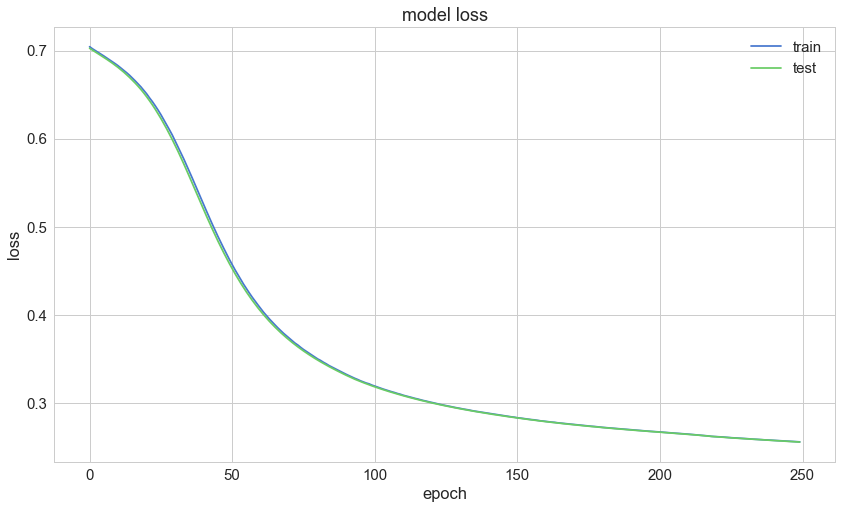

In [515]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


In [516]:
### This is the function that "fits" our test data to the model. The output is our predictions. 

predictions = autoencoder.predict(X_test)

In [517]:
#predictions
preds = predictions.reshape(56, 56)

In [518]:
### Very simple error squared. Probaly not appropriate for our complex problem, but using in this example...
mse = (preds - X_test)**2

In [458]:
### For reference 
print X_test.shape
print mse.shape

(56, 56)
(56, 56)


#### Next we go into model output evaluation 

In [580]:
s = np.array(mse) # needs to be in an array format 

Here we need to check dimensions... For our first reconstruction, we will only use 1 vector in our matrix. 

In [520]:
### print dim of preds & s array. 
print preds[1].shape
print s[1].shape

(56,)
(56,)


In [451]:
preds[1] # for visual

array([0.09451018, 0.0986227 , 0.17832392, 0.11354709, 0.12856528,
       0.09585654, 0.06165539, 0.08190437, 0.25877368, 0.14115383,
       0.13345575, 0.21860786, 0.14255656, 0.06920095, 0.07344244,
       0.12524402, 0.06361816, 0.08457754, 0.13679372, 0.14628875,
       0.15893646, 0.23724058, 0.21747078, 0.08894303, 0.06998922,
       0.0927389 , 0.09753022, 0.11428148, 0.11716493, 0.11072776,
       0.14484495, 0.12180717, 0.37692887, 0.10379437, 0.20651154,
       0.07400124, 0.12613827, 0.19972675, 0.12024453, 0.12091145,
       0.16997172, 0.06630476, 0.08346543, 0.31873238, 0.15290123,
       0.10021716, 0.0649934 , 0.15023644, 0.07248451, 0.11902256,
       0.05744587, 0.12754168, 0.11252798, 0.13108481, 0.13769548,
       0.10495048], dtype=float32)

In [446]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [581]:
""" not sure, but rounding preds worked for ROC - someone could look 
into this to see if it is applicable to auto-encoders like it is for classification? """

#fpr, tpr, thresholds = roc_curve(np.round(preds[1]), s[1], pos_label=1)
#roc_auc = auc(fpr, tpr)

#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
#plt.legend(loc='lower right')
#plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.001, 1])
#plt.ylim([0, 1.001])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

In [524]:
#confusion_matrix(np.round(preds[1]), X_test.values[1])

array([[51,  5],
       [ 0,  0]])

Setting the threshold should be picked based off StDev, Mean, Loss, a sombination, or other advanced stats. In this example it is arbitrary.... 

In [525]:
threshold = 0.5 #yolo

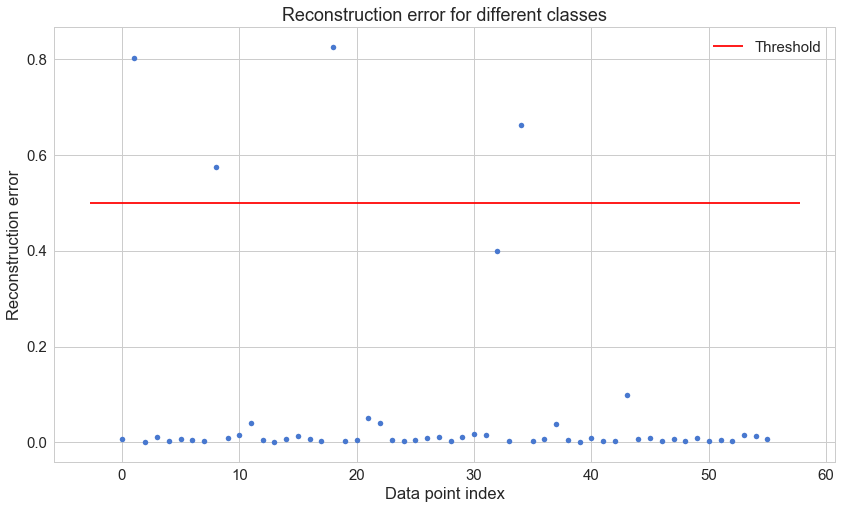

In [526]:
### It works, and we are looking at the reconstruction error of preds[1] only. 
### Need to figure out how to do them all at once...?

fig, ax = plt.subplots()

ax.plot(s[1], marker='o', ms=5.5, linestyle='')
        #label = "Anomoly" if i >= threshold else "normal") ### Need to fix this
            
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# It works!
## 1. Above is the single vector example....

## 2. Below is the "flattened" array for the entire 10k. 

### We obviously need to improve the performance!!!

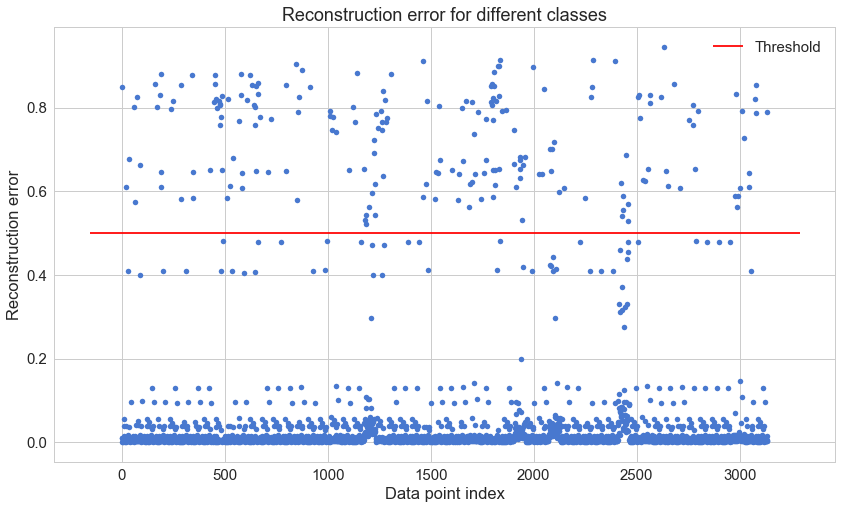

In [527]:
### Trying it now with np.flatten... 
fig, ax = plt.subplots()

ax.plot(s.flatten(), marker='o', ms=5.5, linestyle='')
        #label = "Anomoly" if i >= threshold else "normal")
            
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

## Wanted to try on a image, but came up with another test

### I am changing the element Z[1,0] (a copy of data10k) so that 1 element is changed based on the Xtrain.

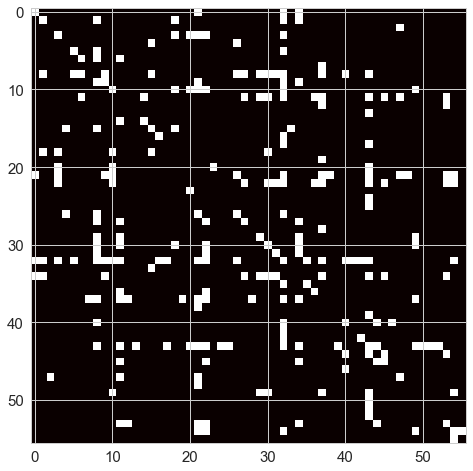

In [492]:
#View of matrix from graph in heatmap form... 
plt.imshow(X_test.values, cmap='hot') #, interpolation='nearest')
plt.show()
#plt.savefig('X_test')

In [533]:
Z = X_test.values ### Just setting up a copy

In [534]:
Z.shape #dimension check

(56, 56)

In [571]:
Z[1,0] = 3 ### Changing the element to a 3... where it used to be a zero

In [572]:
### See the 3...? lol
Z

array([[1., 0., 0., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

### "Real-life" anamoly detection? 

1. Our model is already trained, so by taking Z and running it through the "autoencoder.predict()" we fit the new data to the trained model. 
2. We run the same reshape, 
3. and mse on the data. 
4. finally, convert into an array just like before 

In [576]:
## Example / Test for a different 
predictions_z = autoencoder.predict(Z)
preds_z = predictions.reshape(56, 56)
mse_z = (preds - X_test)**2
s_z = np.array(mse_z)

### What do ya know? It works!

#### If you remember before, some of the points were above that 0.5 threshold... They may or may not have been anamolies, but by theory we test against Z which had a big signal change in it so the points that were once thought of as "bad reconstruction = anamolies" can be seen to be within a normal range. 

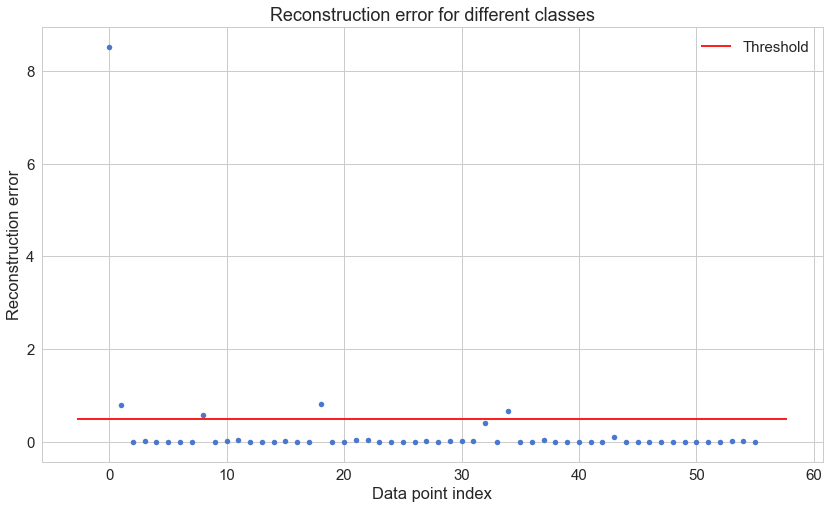

In [579]:
fig, ax = plt.subplots()

ax.plot(s_z[1], marker='o', ms=5.5, linestyle='')
        #label = "Anomoly" if i >= threshold else "normal")
            
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

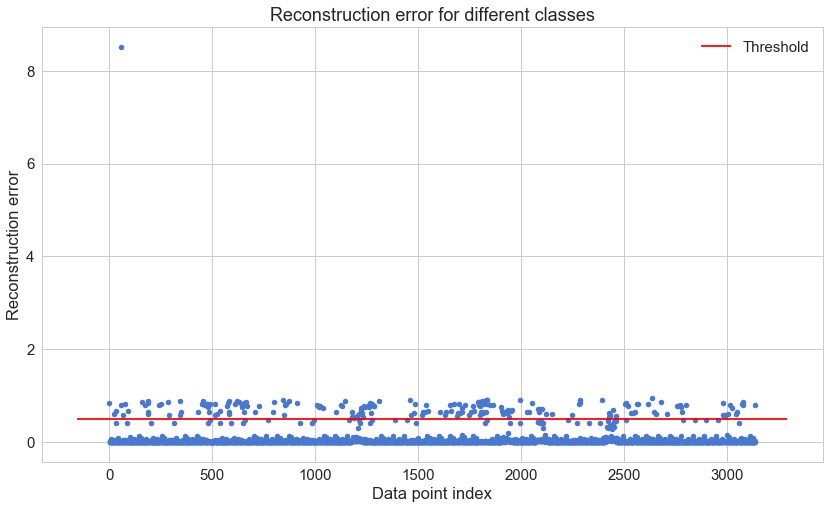

In [582]:
fig, ax = plt.subplots()

#for i in s.flatten():
ax.plot(s_z.flatten(), marker='o', ms=5.5, linestyle='')
        #label = "Anomoly" if i >= threshold else "normal")
            
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# If you made it this far...

### I hope my comments, train of thought, spelling, or grammar didn't throw anyone for a loop. lol

# Next Steps

### 1. contiune to improve model
### 2. contiune to progress on data processing / dimensions / time series / "movie" ?
### 3. research 1D CNNs 
### 4. Team's comments / other Team thoughts! 